# PYMACEUTICALS

#### Data Oberservations
* The Capomulin treatment decreased cancer tumor volume by 17% over a 45 day period in mice trials.
* In all drug trials, metastatic sites increase over the 45 day period, however, with use of the medication Infubinol metastatic sites started to decrease at Day 30. 
* Survival rate of the mice was highest with the medication Capomulin.

### Data Import & Checks

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in csvs
clinical_trial_df = pd.read_csv("clinicaltrial_data.csv")
mouse_data_df = pd.read_csv("mouse_drug_data.csv")

In [3]:
#check data
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#check data
mouse_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
#merge csvs on Mouse ID
cancer_df = pd.merge(mouse_data_df, clinical_trial_df, on = "Mouse ID", how = "outer")

#check dataframe
cancer_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Tumor Volume Response to Treatment

In [6]:
#create separate dataframe with needed information
tumor_response = cancer_df.loc[:, ["Drug","Timepoint", "Tumor Volume (mm3)"]]

#drop unneeded drugs
tumor_response = tumor_response.loc[(tumor_response["Drug"] == "Capomulin")| 
                                    (tumor_response["Drug"] == "Infubinol")|
                                    (tumor_response["Drug"] == "Ketapril")|
                                    (tumor_response["Drug"] == "Placebo")]

#group by drug type and timepoint
tumor_response = tumor_response.groupby(["Drug", "Timepoint"])

#tumor volume central tendenacies 
tumor_central = tumor_response.median()
tumor_central = tumor_central.unstack(level = 0)
tumor_central

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  45.597064  46.877243  47.059664  46.989764
10                 43.421014  49.471244  49.797416  49.109721
15                 42.798160  51.265440  52.246310  51.271314
20                 40.716428  53.862724  54.250054  53.006865
25                 40.224165  55.924633  56.957917  57.106418
30                 39.260371  59.133640  60.296505  59.916934
35                 38.360455  60.722723  62.539154  62.970450
40                 36.843898  63.344283  66.229606  66.287744
45                 37.311846  66.083066  69.872251  69.042841

In [7]:
#format dataframe for plotting
tumor_timepoint = tumor_central.reset_index()
tumor_timepoint.head()

Timepoint Tumor Volume (mm3)                                 
Drug                    Capomulin  Infubinol   Ketapril    Placebo
0            0          45.000000  45.000000  45.000000  45.000000
1            5          45.597064  46.877243  47.059664  46.989764
2           10          43.421014  49.471244  49.797416  49.109721
3           15          42.798160  51.265440  52.246310  51.271314
4           20          40.716428  53.862724  54.250054  53.006865

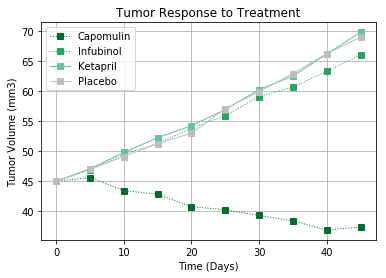

In [8]:
#create plot
cap, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Capomulin"], linestyle = ":", 
                linewidth= 1 , label= "Capomulin", color = "#006d2c", marker = "s")

inf, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Infubinol"], linestyle = ":", 
                linewidth = 1 ,label = "Infubinol", color = "#2ca25f", marker = "s")

ket, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Ketapril"], linewidth = 1, 
                label = "Ketapril", color = "#66c2a4", marker = "s")

pla, = plt.plot(tumor_timepoint["Timepoint"], 
                tumor_timepoint["Tumor Volume (mm3)"]["Placebo"], linewidth = 1, 
                label = "Placebo", color = "#bdbdbd", marker = "s")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(handles = [cap,inf,ket,pla], loc = "best")
plt.show()

### Metastatic Site Response to Treatment

In [9]:
#create separate dataframe with needed information
metastatic_response = cancer_df.loc[:, ["Drug","Timepoint", "Metastatic Sites"]]

#drop unneeded drugs
metastatic_response = metastatic_response.loc[(metastatic_response["Drug"] == "Capomulin")| 
                                              (metastatic_response["Drug"] == "Infubinol")|
                                              (metastatic_response["Drug"] == "Ketapril")|
                                              (metastatic_response["Drug"] == "Placebo")]

#group by drug type and timepoint
metastatic_group = metastatic_response.groupby(["Drug", "Timepoint"])

#tumor volume central tendenacies 
metastatic_sum = metastatic_group.sum()
metastatic_sum = metastatic_sum.unstack(level = 0)
metastatic_sum

Metastatic Sites                           
Drug             Capomulin Infubinol Ketapril Placebo
Timepoint                                            
0                        0         0        0       0
5                        4         7        7       9
10                       8        14       13      20
15                       9        19       16      25
20                      15        21       23      29
25                      18        23       31      33
30                      24        27       37      34
35                      26        20       39      37
40                      29        21       41      38
45                      31        19       37      36

In [10]:
#format dataframe for plotting
metastatic_timepoint = metastatic_sum.reset_index()
metastatic_timepoint.head()

Timepoint Metastatic Sites                           
Drug                  Capomulin Infubinol Ketapril Placebo
0            0                0         0        0       0
1            5                4         7        7       9
2           10                8        14       13      20
3           15                9        19       16      25
4           20               15        21       23      29

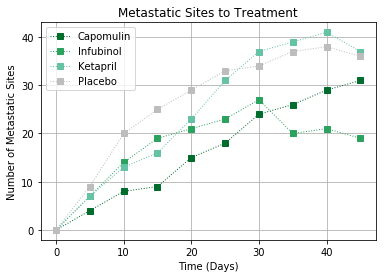

In [11]:
#create plot
cap, = plt.plot(metastatic_timepoint["Timepoint"], 
                metastatic_timepoint["Metastatic Sites"]["Capomulin"], linestyle = ":", 
                linewidth=1, label = "Capomulin", color = "#006d2c", marker = "s")

inf, = plt.plot(metastatic_timepoint["Timepoint"], 
                metastatic_timepoint["Metastatic Sites"]["Infubinol"], linestyle = ":", 
                linewidth = 1, label = 'Infubinol', color = "#2ca25f", marker = "s")

ket, = plt.plot(metastatic_timepoint["Timepoint"], 
                metastatic_timepoint["Metastatic Sites"]["Ketapril"], linestyle = ":", 
                linewidth = 1, label = "Ketapril", color = "#66c2a4", marker = "s")

pla, = plt.plot(metastatic_timepoint["Timepoint"], 
                metastatic_timepoint["Metastatic Sites"]["Placebo"], linestyle = ":", 
                linewidth = 1, label = "Placebo", color = "#bdbdbd", marker = "s")

plt.title('Metastatic Sites to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Metastatic Sites')
plt.grid(True)
plt.legend(handles=[cap,inf,ket,pla], loc='best')
plt.show()

### Survival Rate Response to Treatment

In [12]:
#create separate dataframe with needed information
survival_rate = cancer_df.loc[:, ["Drug","Timepoint", "Mouse ID"]]

#drop unneeded drugs
survival_rate = survival_rate.loc[(survival_rate["Drug"] == "Capomulin")|
                                  (survival_rate["Drug"] == "Infubinol")|
                                  (survival_rate["Drug"] == "Ketapril")|
                                  (survival_rate["Drug"] == "Placebo")]

#group by drug type and timepoint
survival_rate = survival_rate.groupby(["Drug", "Timepoint"])

#count mouse ids
mouse_count = survival_rate.count()
mouse_count = mouse_count.unstack(level = 0)
mouse_count

Mouse ID                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19
25               22        18       19      17
30               22        17       18      15
35               22        12       17      14
40               21        10       15      12
45               21         9       11      11

In [13]:
#formate dataframe for plotting
mouse_timepoint = mouse_count.reset_index()
mouse_timepoint.head()

Timepoint  Mouse ID                           
Drug           Capomulin Infubinol Ketapril Placebo
0            0        25        25       25      25
1            5        25        25       23      24
2           10        25        21       22      24
3           15        24        21       19      20
4           20        23        20       19      19

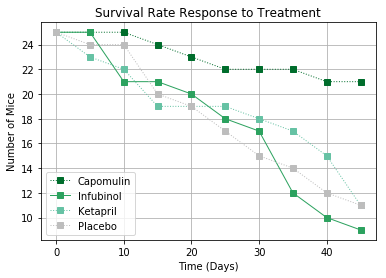

In [14]:
#create plot
cap, = plt.plot(mouse_timepoint["Timepoint"], 
                mouse_timepoint["Mouse ID"]["Capomulin"], linestyle = ":", 
                linewidth = 1,label = "Capomulin", color = "#006d2c", marker = "s")

inf, = plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Mouse ID"]["Infubinol"],
                linewidth = 1, label = "Infubinol", color = "#2ca25f", marker = "s")

ket, = plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Mouse ID"]["Ketapril"], 
                linestyle = ":", linewidth = 1, label = "Ketapril", color = "#66c2a4", marker = "s")

pla, = plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Mouse ID"]["Placebo"], 
                linestyle = ":", linewidth = 1, label = "Placebo", color = "#bdbdbd", marker = "s")

plt.title("Survival Rate Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Mice")
plt.grid(True)
plt.legend(handles=[cap,inf,ket,pla], loc = "best")
plt.show()

### Percent Change in Tumor Size Based on Treatment

In [67]:
#take dataframe from tumor volume plot and calcuate percent change over timeperiod
tumor_response.head()
tumor_change = tumor_response.median()
tumor_pct_change = tumor_change.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
tumor_pct_change.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    1.326808
          10                  -3.508857
          15                  -4.892979
          20                  -9.519049

In [66]:
#format dataframe for plotting
tumor_table = tumor_pct_change.reset_index()
tumor_table.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,1.326808
2,Capomulin,10,-3.508857
3,Capomulin,15,-4.892979
4,Capomulin,20,-9.519049


In [17]:
#pull out final percent changes
tumor_final_change = tumor_table.iloc[9]
tumor_final_change = tumor_final_change.tolist()
tumor_final_change = tumor_final_change[0:]
tumor_final_change

[-17.084787168000005,
 46.851257533333325,
 55.27166843266669,
 53.428535150444475]

In [62]:
plot_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                       "Percent Change": tumor_final_change})

plot_df

,Drug,Percent Change
0,Capomulin,-17.084787
1,Infubinol,46.851258
2,Ketapril,55.271668
3,Placebo,53.428535


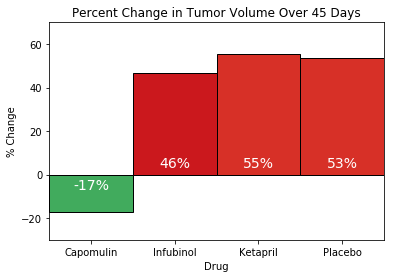

In [81]:
#create basic bar plot structure
axis = range(len(plot_df))

bar1 = plt.bar(0, plot_df["Percent Change"][0], color = "#41ab5d", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar2 = plt.bar(1, plot_df["Percent Change"][1], color = "#cb181d", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar3 = plt.bar(2, plot_df["Percent Change"][2], color= "#d73027", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)
bar4 = plt.bar(3, plot_df["Percent Change"][3], color= "#d73027", alpha = 1, align = "edge", 
               edgecolor = "black", width=1)

tick_locations = [value + 0.5 for value in axis]
plt.xticks(tick_locations, plot_df["Drug"])
plt.xlim(0, 4)
plt.ylim(-30, 70)

#add plot labels
plt.title("Percent Change in Tumor Volume Over 45 Days")
plt.xlabel("Drug")
plt.ylabel("% Change")

def autolabel(bar):
    for bar in bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(bar1)

def autolabel(bar):
    for bar in bar:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(bar2)
autolabel(bar3)
autolabel(bar4)

plt.show()